## EDA on Disaster Loss in Indonesia

1. Data Description

This dataset is downloaded from https://data.world/unisdr/6abc5323-7218-4592-9ab3-70c7e659f366

2. Load Libraries and Dataset

In [69]:
# import the important libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime

In [32]:
disaster_data = pd.read_excel("data\disaster_loss_data_indonesia.xlsx")

3. Data Exploration

3.1 Data Understanding

In [33]:
pd.options.display.max_columns = None
disaster_data


,Serial,Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Date (YMD),Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
0,15055,FIRE,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2011/7/3,Ds. Rangdu Kec. Seririt,NaN,NaN,BPBD Kab. Buleleng,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
1,14019,SURGE,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2011/2/6,"""Prov. Bali\n\nKab. Buleleng\n\nKec. Seririt\n...",NaN,NaN,Pusdalops BPBD bali,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8682,TSUNAMI,51,BALI,5103.0,BADUNG,NaN,NaN,NaN,1977/8/19,0,NaN,NaN,majalah Tempo tgl. 03-09-1977 hal.6,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14296,FIRE,51,BALI,5104.0,GIANYAR,NaN,NaN,NaN,2011/3/21,Kec. Ubud Desa Mas Br. Abianseka,NaN,NaN,BPBD Kab. Gianyar,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN
4,17497,LANDSLIDES,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2012/12/22,Desa Kedis,NaN,NaN,BPBD Buleleng,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,2482,FLOODS AND LANDSLIDES,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2006/1/21,Desa Tajun Kec Kutambahan,NaN,NaN,Kesbanglinmas 07/02/06 dan Depkes,NaN,NaN,NaN,1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17927,4477,FLOODS,51,BALI,5107.0,KARANG ASEM,NaN,NaN,Karangasem,1999/3/7,"40 rumah rr, 409 jiwa menderita",NaN,NaN,Set BKN,NaN,NaN,NaN,1,NaN,NaN,NaN,68.0,40.0,NaN,409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17928,14576,STRONG WIND,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2011/4/25,"Desa Grokgak (Banjar Dinas Batu Agung, Banjar ...",NaN,NaN,BPBD Kab. Buleleng,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17929,15443,STRONG WIND,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2011/9/27,Desa Pendawa Kec Banjar,NaN,NaN,BPBD Kab Buleleng (Telp./Fax: 0362-23022),NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [34]:
disaster_data.shape

(17931, 32)

In [35]:
disaster_data.size

573792

In [36]:
disaster_data.columns

Index(['Serial', 'Event', 'Code Province', 'Province', 'Code District',
       'District', 'Code Sub-District', 'Sub-District', 'Location',
       'Date (YMD)', 'Comments', 'Cause', 'Description of Cause', 'Source',
       'Magnitude', 'GLIDEnumber', 'Other sectors', 'DataCards', 'Deaths',
       'Injured', 'Missing', 'Houses Destroyed', 'Houses Damaged', 'Victims',
       'Affected', 'Relocated', 'Evacuated', 'Losses $USD', 'Losses $Local',
       'Education centers', 'Hospitals', 'Damages in crops Ha.'],
      dtype='object')

In [37]:
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17931 entries, 0 to 17930
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial                17931 non-null  int64  
 1   Event                 17931 non-null  object 
 2   Code Province         17931 non-null  int64  
 3   Province              17931 non-null  object 
 4   Code District         17775 non-null  float64
 5   District              17775 non-null  object 
 6   Code Sub-District     0 non-null      float64
 7   Sub-District          0 non-null      float64
 8   Location              3472 non-null   object 
 9   Date (YMD)            17931 non-null  object 
 10  Comments              14429 non-null  object 
 11  Cause                 0 non-null      float64
 12  Description of Cause  0 non-null      float64
 13  Source                17553 non-null  object 
 14  Magnitude             0 non-null      float64
 15  GLIDEnumber        

In [53]:
# we can change Date (YMD) to datetime type

# rename columns date to make it easier
disaster_data = disaster_data.rename(columns={'Date (YMD)': 'Date'})
# since the "Date" column is not in datetime format, we need to convert it

disaster_data['Date'] = pd.to_datetime(disaster_data['Date'], format='%Y/%m/%d', errors='coerce')

# Replace missing day values with day 1
# disaster_data['Date'] = disaster_data['Date'].dt.replace(day=1)
disaster_data['Date'] = disaster_data['Date'].dt.strftime('%Y-%m-%d')

disaster_data['Date'] = pd.to_datetime(disaster_data['Date'])

In [72]:
disaster_data['Date'].min()

Timestamp('1815-04-10 00:00:00')

In [73]:
disaster_data['Date'].max()

Timestamp('2014-08-31 00:00:00')

In [55]:
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17931 entries, 0 to 17930
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Serial                17931 non-null  int64         
 1   Event                 17931 non-null  object        
 2   Code Province         17931 non-null  int64         
 3   Province              17931 non-null  object        
 4   Code District         17775 non-null  float64       
 5   District              17775 non-null  object        
 6   Code Sub-District     0 non-null      float64       
 7   Sub-District          0 non-null      float64       
 8   Location              3472 non-null   object        
 9   Date                  17901 non-null  datetime64[ns]
 10  Comments              14429 non-null  object        
 11  Cause                 0 non-null      float64       
 12  Description of Cause  0 non-null      float64       
 13  Source          

In [59]:
disaster_data.sort_values(by=["Date"], ascending=False)

,Serial,Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Date,Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
10519,21013,FLOODS,14,RIAU,1406.0,KAMPAR,NaN,NaN,\tNULL\t,2014-08-31,\tKec. Kampar Kiri Hulu Kel. Muara Selaya \t,NaN,NaN,\tBp. Sawir BPBD Kab. Kampar Via BBM 2A6AE2D0 \t,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12219,21008,FOREST FIRE,36,BANTEN,3604.0,SERANG,NaN,NaN,\tNULL\t,2014-08-29,\tKec. Bojonegara Ds. Argawana \t,NaN,NaN,\tBPBD Prov. Banten Bp. Chaerubi (pusdalops) V...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10518,21011,INDUSTRIAL ACCIDENT,21,KEPULAUAN RIAU,2171.0,KOTA B A T A M,NaN,NaN,\tNULL\t,2014-08-29,"\tKerugian Materil : "" 1 unit Tongkang RB \t",NaN,NaN,\tBPBD Kota Batam Bp. Asman (Kalak) Via Tlp. 0...,NaN,NaN,NaN,1,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10523,21012,LANDSLIDES,32,JAWA BARAT,3203.0,CIANJUR,NaN,NaN,\tNULL\t,2014-08-29,\tKec. Cikadu Ds. Cisaranten \t,NaN,NaN,\tBpk. Asep (Kalak BPBD Kab. Cianjur) Via Telp...,NaN,NaN,NaN,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10522,21010,STRONG WIND,32,JAWA BARAT,3204.0,BANDUNG,NaN,NaN,\tNULL\t,2014-08-29,\tKec. Rancatungku Ds. Rancamulya Kp. Ranca Ka...,NaN,NaN,\tBPBD Prov. Jabar Bp. M. Warasjaya (Kalak) Vi...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14010,8658,FLOODS,11,PEMERINTAH ACEH,1171.0,KOTA BANDA ACEH,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Majalah Tempo tgl 25-10-1975,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0
14855,8635,FLOODS,33,JAWA TENGAH,3301.0,CILACAP,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Majalah Tempo Tgl. 13-10-19731 Hal.7,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
15791,8767,EPIDEMIC,11,PEMERINTAH ACEH,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,www.adrc.or.jp/databook_20th/Idni.xls,NaN,NaN,NaN,1,55.0,NaN,NaN,NaN,NaN,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16252,8679,FLOODS,63,KALIMANTAN SELATAN,6303.0,BANJAR,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Majalah Tempo tgl.30-04-1977,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,NaN,NaN


In [60]:
disaster_data.describe()

,Serial,Code Province,Code District,Code Sub-District,Sub-District,Date,Cause,Description of Cause,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
count,17931.000000,17931.000000,17775.000000,0.0,0.0,17901,0.0,0.0,0.0,0.0,0.0,17931.0,2333.000000,1851.000000,381.000000,3307.000000,1437.000000,0.0,2.069000e+03,0.0,2139.000000,0.0,3.458000e+03,1129.000000,390.000000,3901.000000
mean,10459.852769,38.971111,3916.961800,NaN,NaN,2008-10-08 06:19:26.817496064,NaN,NaN,NaN,NaN,NaN,1.0,128.681097,228.341437,55.750656,332.374660,800.410578,NaN,1.129041e+04,NaN,4275.509116,NaN,1.359787e+05,31.875996,12.153846,974.515235
min,1.000000,11.000000,1101.000000,NaN,NaN,1815-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000e+00,NaN,1.000000,NaN,3.000000e-01,1.000000,1.000000,0.030000
25%,4489.500000,32.000000,3202.000000,NaN,NaN,2007-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,2.000000,1.000000,2.000000,6.000000,NaN,1.600000e+01,NaN,31.000000,NaN,1.500000e+01,1.000000,1.000000,19.000000
50%,10309.000000,33.000000,3320.000000,NaN,NaN,2010-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,4.000000,2.000000,7.000000,24.000000,NaN,1.600000e+02,NaN,200.000000,NaN,5.750000e+01,2.000000,2.000000,86.000000
75%,16509.500000,53.000000,5307.000000,NaN,NaN,2012-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,5.000000,19.000000,7.000000,33.000000,125.000000,NaN,1.770000e+03,NaN,1248.500000,NaN,2.500000e+02,8.000000,6.000000,367.000000
max,21013.000000,94.000000,9471.000000,NaN,NaN,2014-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,77804.000000,56213.000000,5001.000000,96576.000000,96576.000000,NaN,4.238797e+06,NaN,802804.000000,NaN,2.347500e+08,3547.000000,1000.000000,259384.000000
std,6471.663447,20.037802,2003.614116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2138.733027,1918.209161,337.202115,3173.948978,4919.322175,NaN,1.387253e+05,NaN,28257.123622,NaN,4.673749e+06,185.020026,55.704296,7215.673879


In [39]:
disaster_data.describe(include="all")

,Serial,Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Date (YMD),Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
count,17931.000000,17931,17931.000000,17931,17775.000000,17775,0.0,0.0,3472,17931,14429,0.0,0.0,17553,0.0,0.0,0.0,17931.0,2333.000000,1851.000000,381.000000,3307.000000,1437.000000,0.0,2.069000e+03,0.0,2139.000000,0.0,3.458000e+03,1129.000000,390.000000,3901.000000
unique,NaN,20,NaN,34,NaN,480,NaN,NaN,236,4118,11123,NaN,NaN,5047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FLOODS,NaN,JAWA TENGAH,NaN,BANDUNG,NaN,NaN,NULL\t,2011/9/1,0,NaN,NaN,Deptan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5721,NaN,3437,NaN,392,NaN,NaN,1804,90,1399,NaN,NaN,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10459.852769,NaN,38.971111,NaN,3916.961800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,128.681097,228.341437,55.750656,332.374660,800.410578,NaN,1.129041e+04,NaN,4275.509116,NaN,1.359787e+05,31.875996,12.153846,974.515235
std,6471.663447,NaN,20.037802,NaN,2003.614116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2138.733027,1918.209161,337.202115,3173.948978,4919.322175,NaN,1.387253e+05,NaN,28257.123622,NaN,4.673749e+06,185.020026,55.704296,7215.673879
min,1.000000,NaN,11.000000,NaN,1101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000e+00,NaN,1.000000,NaN,3.000000e-01,1.000000,1.000000,0.030000
25%,4489.500000,NaN,32.000000,NaN,3202.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,2.000000,1.000000,2.000000,6.000000,NaN,1.600000e+01,NaN,31.000000,NaN,1.500000e+01,1.000000,1.000000,19.000000
50%,10309.000000,NaN,33.000000,NaN,3320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,4.000000,2.000000,7.000000,24.000000,NaN,1.600000e+02,NaN,200.000000,NaN,5.750000e+01,2.000000,2.000000,86.000000
75%,16509.500000,NaN,53.000000,NaN,5307.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.000000,19.000000,7.000000,33.000000,125.000000,NaN,1.770000e+03,NaN,1248.500000,NaN,2.500000e+02,8.000000,6.000000,367.000000


In [40]:
disaster_data.nunique()

Serial                  17931
Event                      20
Code Province              34
Province                   34
Code District             480
District                  480
Code Sub-District           0
Sub-District                0
Location                  236
Date (YMD)               4118
Comments                11123
Cause                       0
Description of Cause        0
Source                   5047
Magnitude                   0
GLIDEnumber                 0
Other sectors               0
DataCards                   1
Deaths                    156
Injured                   290
Missing                    70
Houses Destroyed          414
Houses Damaged            415
Victims                     0
Affected                  931
Relocated                   0
Evacuated                 933
Losses $USD                 0
Losses $Local             922
Education centers         125
Hospitals                  52
Damages in crops Ha.     1124
dtype: int64

3.2 Data Preparation (Data Cleaning)

In [41]:
# there's so many null columns inserted in the dataset
# i think it's better to remove unused columns and we can filter it based on total nulls of the dataset

missed_data = disaster_data.isnull().sum()
missed_data

Serial                      0
Event                       0
Code Province               0
Province                    0
Code District             156
District                  156
Code Sub-District       17931
Sub-District            17931
Location                14459
Date (YMD)                  0
Comments                 3502
Cause                   17931
Description of Cause    17931
Source                    378
Magnitude               17931
GLIDEnumber             17931
Other sectors           17931
DataCards                   0
Deaths                  15598
Injured                 16080
Missing                 17550
Houses Destroyed        14624
Houses Damaged          16494
Victims                 17931
Affected                15862
Relocated               17931
Evacuated               15792
Losses $USD             17931
Losses $Local           14473
Education centers       16802
Hospitals               17541
Damages in crops Ha.    14030
dtype: int64

In [42]:
missed_data_2 = (disaster_data.isnull().sum() / len(disaster_data)) *100
missed_data_2

Serial                    0.000000
Event                     0.000000
Code Province             0.000000
Province                  0.000000
Code District             0.870002
District                  0.870002
Code Sub-District       100.000000
Sub-District            100.000000
Location                 80.636886
Date (YMD)                0.000000
Comments                 19.530422
Cause                   100.000000
Description of Cause    100.000000
Source                    2.108081
Magnitude               100.000000
GLIDEnumber             100.000000
Other sectors           100.000000
DataCards                 0.000000
Deaths                   86.989013
Injured                  89.677096
Missing                  97.875188
Houses Destroyed         81.557080
Houses Damaged           91.985946
Victims                 100.000000
Affected                 88.461324
Relocated               100.000000
Evacuated                88.070939
Losses $USD             100.000000
Losses $Local       

In [43]:
# we can see the percentage of the missing values in the columns

pd.concat([missed_data,missed_data_2],axis=1,keys=['Total','Missing (%)'])

,Total,Missing (%)
Serial,0,0.000000
Event,0,0.000000
Code Province,0,0.000000
Province,0,0.000000
Code District,156,0.870002
District,156,0.870002
Code Sub-District,17931,100.000000
Sub-District,17931,100.000000
Location,14459,80.636886
Date (YMD),0,0.000000


<Axes: >

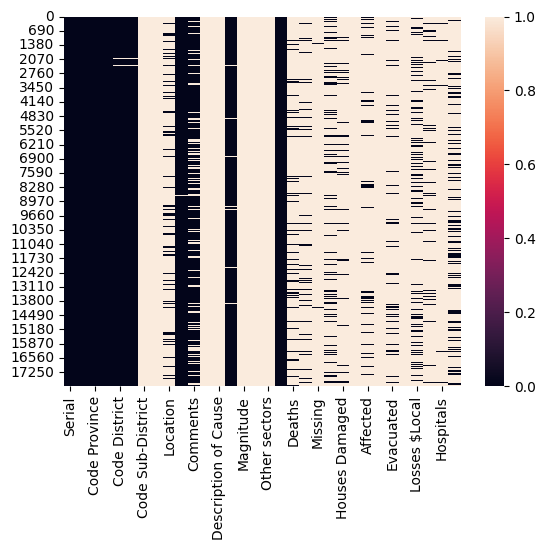

In [61]:
sns.heatmap(disaster_data.isnull())   

In [70]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df.isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def summary_table(df):

    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

def heatmap(df, index,columns,values,vmax,Title):
    DisasterDuration_wide = df.pivot(index=index, columns=columns, values=values)
    #DisasterDuration_wide = DisasterDuration_wide.sort_values(by = sort_by, ascending = False)#ignore_index = True)

    plt.figure(figsize=(12,8))

    ax = sns.heatmap(DisasterDuration_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()
    
def histplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x)
    plt.xticks(rotation=70,fontsize = 8)
    ax.set_xlabel(x_axis_title)
    ax.set_ylabel(y_axys_title)
    plt.title(plot_title, fontsize = 16,weight = 'bold')    

def bar_plot(x,y,xlabel,ylabel,title, label):
    plt.figure(figsize=(20,5))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.barplot(x=x, y = y, palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=90,fontsize = 12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    
    if label == 'percent':
        for p in ax.patches:
                     ax.annotate("%.1f%%" % (100*float(p.get_height()/15827)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                         ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'vertical',
                         textcoords='offset points')
    if label == 'number':
        for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                 ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                 textcoords='offset points')
    

def Null_Analysis(df,title):
    null_columns=df.columns[df.isnull().any()]
    null_columns_plot = df[null_columns].isnull().sum().sort_values(ascending = False)
    bar_plot(null_columns_plot.index, null_columns_plot,"Features", "Number of Null Values", title, 'percent')



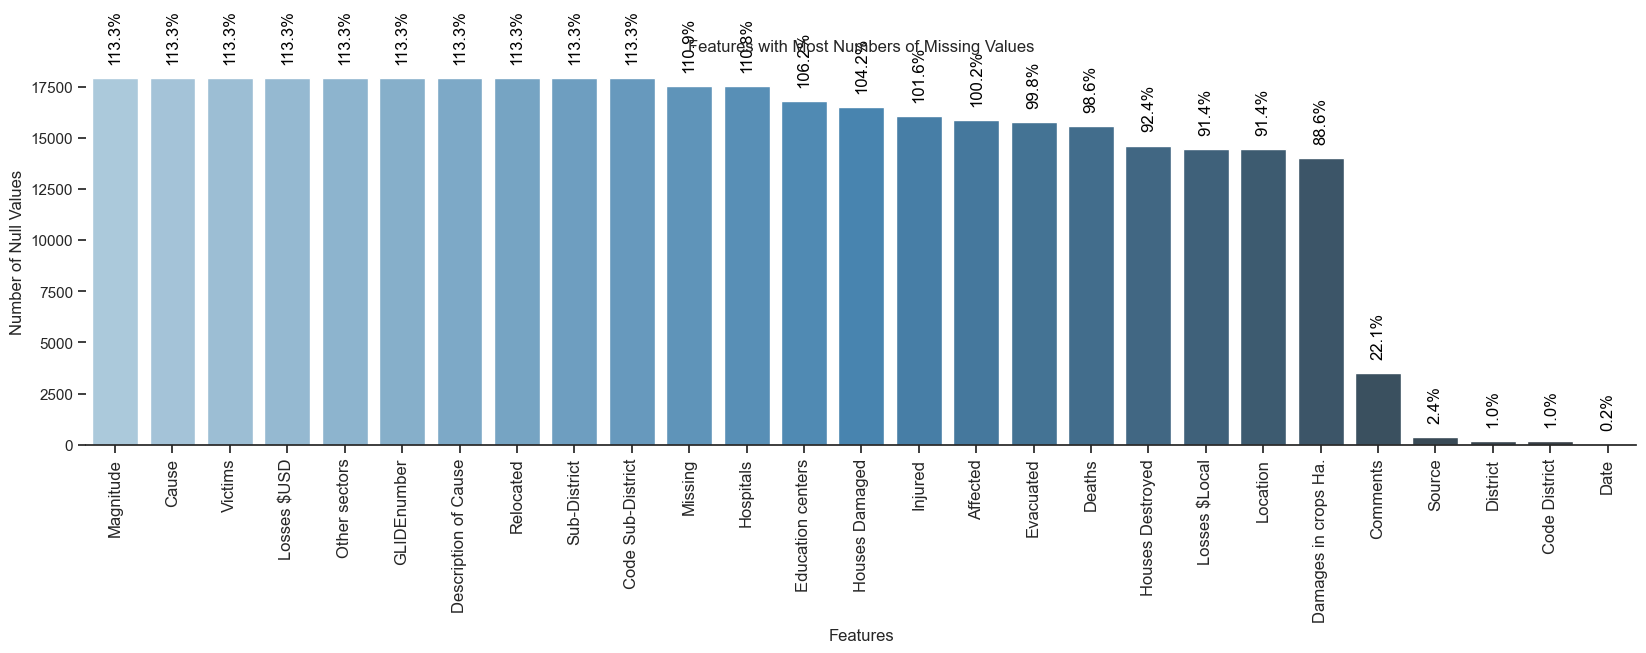

In [71]:
Null_Analysis(disaster_data, 'Features with Most Numbers of Missing Values')

In [44]:

disaster_data_filter = disaster_data.filter(items=["Date (YMD)",
                                                   "Serial",
                                                   "Event",
                                                   "Province",
                                                   "Deaths",
                                                   "Injured",
                                                   "Missing",
                                                   "Houses Destroyed",
                                                   "Houses Damaged",
                                                   "Affected",
                                                   "Evacuated",
                                                   "Losses $Local",
                                                   "Hospitals",
                                                   "Damages in crops Ha.",
                                                   ])
#  0   Serial                17931 non-null  int64  
#  1   Event                 17931 non-null  object 
#  2   Code Province         17931 non-null  int64  
#  3   Province              17931 non-null  object 
#  4   Code District         17775 non-null  float64
#  5   District              17775 non-null  object 
#  6   Code Sub-District     0 non-null      float64
#  7   Sub-District          0 non-null      float64
#  8   Location              3472 non-null   object 
#  9   Date (YMD)            17931 non-null  object 
#  10  Comments              14429 non-null  object 
#  11  Cause                 0 non-null      float64
#  12  Description of Cause  0 non-null      float64
#  13  Source                17553 non-null  object 
#  14  Magnitude             0 non-null      float64
#  15  GLIDEnumber           0 non-null      float64
#  16  Other sectors         0 non-null      float64
#  17  DataCards             17931 non-null  int64  
#  18  Deaths                2333 non-null   float64
#  19  Injured               1851 non-null   float64
#  20  Missing               381 non-null    float64
#  21  Houses Destroyed      3307 non-null   float64
#  22  Houses Damaged        1437 non-null   float64
#  23  Victims               0 non-null      float64
#  24  Affected              2069 non-null   float64
#  25  Relocated             0 non-null      float64
#  26  Evacuated             2139 non-null   float64
#  27  Losses $USD           0 non-null      float64
#  28  Losses $Local         3458 non-null   float64
#  29  Education centers     1129 non-null   float64
#  30  Hospitals             390 non-null    float64
#  31  Damages in crops Ha.  3901 non-null   float64

In [45]:
# rename columns date to make it easier
disaster_data_filter = disaster_data_filter.rename(columns={'Date (YMD)': 'Date'})
# since the "Date" column is not in datetime format, we need to convert it

disaster_data_filter['Date'] = pd.to_datetime(disaster_data_filter['Date'], format='%Y/%m/%d', errors='coerce')

# Replace missing day values with day 1
# disaster_data_filter['Date'] = disaster_data_filter['Date'].dt.replace(day=1)
disaster_data_filter['Date'] = disaster_data_filter['Date'].dt.strftime('%Y-%m-%d')

disaster_data_filter['Date'] = pd.to_datetime(disaster_data_filter['Date'])
disaster_data_filter
disaster_data_filter.dtypes

Date                    datetime64[ns]
Serial                           int64
Event                           object
Province                        object
Deaths                         float64
Injured                        float64
Missing                        float64
Houses Destroyed               float64
Houses Damaged                 float64
Affected                       float64
Evacuated                      float64
Losses $Local                  float64
Hospitals                      float64
Damages in crops Ha.           float64
dtype: object

In [66]:
# see the unique event in the dataset
sorted(disaster_data_filter["Event"].unique().tolist())

['CLIMATE CHANGE',
 'CONFLICT',
 'DROUGHT',
 'EARTHQUAKE',
 'EARTHQUAKE AND TSUNAMI',
 'EPIDEMIC',
 'ERUPTION',
 'FIRE',
 'FLOODS',
 'FLOODS AND LANDSLIDES',
 'FOREST FIRE',
 'HUNGER',
 'INDUSTRIAL ACCIDENT',
 'LANDSLIDES',
 'PLAGUE',
 'STRONG WIND',
 'SURGE',
 'TERRORISM',
 'TRANSPORTATION ACCIDENT',
 'TSUNAMI']

source: https://www.researchgate.net/publication/311318085_Annual_Disaster_Statistical_Review_2015_The_numbers_and_trends

<center> Natural disaster subgroup classification </center>

<center>
<img src="https://www.researchgate.net/profile/Alizee-Vanderveken/publication/311318085/figure/fig1/AS:434834096037898@1480683935544/Natural-disaster-subgroup-classification.png">
</center>

<center>
<img src="https://www.researchgate.net/profile/Sofiane-Amara/publication/330400757/figure/fig1/AS:715418570350593@1547580487185/Classification-of-natural-disasters-16.ppm">
</center>

In [46]:

# see the unique province in the dataset
disaster_data_filter["Province"].unique().tolist()

['BALI',
 'NUSA TENGGARA BARAT',
 'NUSA TENGGARA TIMUR',
 'SUMATERA UTARA',
 'JAWA TENGAH',
 'KALIMANTAN BARAT',
 'JAWA TIMUR',
 'KALIMANTAN TENGAH',
 'JAWA BARAT',
 'KALIMANTAN SELATAN',
 'JAMBI',
 'RIAU',
 'SUMATERA SELATAN',
 'LAMPUNG',
 'DI YOGYAKARTA',
 'BANTEN',
 'PEMERINTAH ACEH',
 'KALIMANTAN TIMUR',
 'SULAWESI UTARA',
 'SULAWESI TENGAH',
 'SULAWESI SELATAN',
 'PAPUA',
 'SUMATERA BARAT',
 'SULAWESI BARAT',
 'SULAWESI TENGGARA',
 'KEPULAUAN RIAU',
 'GORONTALO',
 'BENGKULU',
 'KALIMANTAN UTARA',
 'DKI JAKARTA',
 'BANGKA-BELITUNG',
 'MALUKU',
 'MALUKU UTARA',
 'PAPUA BARAT']

In [47]:
disaster_data_filter.describe()
disaster_data_filter.describe(include='all')
# see the containing unique data in every columns

disaster_data_filter.nunique()

Date                     4095
Serial                  17931
Event                      20
Province                   34
Deaths                    156
Injured                   290
Missing                    70
Houses Destroyed          414
Houses Damaged            415
Affected                  931
Evacuated                 933
Losses $Local             922
Hospitals                  52
Damages in crops Ha.     1124
dtype: int64

In [48]:
# disaster_data_filter_event_count = disaster_data_filter.groupby('Event').agg(['count', 'mean', 'std', 'min', 'max'])

# disaster_data_filter_event_count.columns = [f'{col[0]}_{col[1]}' for col in disaster_data_filter_event_count.columns]

# disaster_data_filter_event_count

# # grouped_data = df.groupby('Category').agg(['mean', 'std', 'min', 'max'])